In [2]:
#Импорт необходимых модулей
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
from celluloid import Camera
import plotly.graph_objects as go
import warnings

In [3]:
#Считывание таблицы данных
df_P = pd.read_excel("database/f221117_133630-P.xlsx", header=None)
df_P

0           1           2           3           4           5    \
0           Kmob   52.911957   52.920532   52.906242   52.914818   52.891964   
1        AdcFreq   40.000000   40.000000   40.000000   40.000000   40.000000   
2       SpeStart  800.000000  800.000000  800.000000  800.000000  800.000000   
3     TimeOffset   84.095268  245.807144  406.653015  567.119087  731.014236   
4              0   -7.000000   -9.000000   -7.000000  -16.000000  -15.000000   
...          ...         ...         ...         ...         ...         ...   
1999        1995 -130.000000 -135.000000 -139.000000 -141.000000 -138.000000   
2000        1996 -124.000000 -128.000000 -130.000000 -135.000000 -132.000000   
2001        1997 -107.000000 -113.000000 -116.000000 -121.000000 -121.000000   
2002        1998  -95.000000 -101.000000 -104.000000 -110.000000 -110.000000   
2003        1999  -92.000000  -96.000000 -101.000000 -109.000000 -109.000000   

             6            7            8            9    ...           156  \
0      52.923386    52.900532    52.877701    52.939129  ...     52.916988   
1      40.000000    40.000000    40.000000    40.000000  ...     40.000000   
2     800.000000   800.000000   800.000000   800.000000  ...    800.000000   
3     907.766060  1046.712734  1208.694004  1368.904362  ...  24945.879543   
4     -13.000000   -21.000000   -21.000000   -26.000000  ...    -26.000000   
...          ...          ...          ...          ...  ...           ...   
1999 -135.000000  -133.000000  -135.000000  -138.000000  ...   -110.000000   
2000 -130.000000  -126.000000  -127.000000  -131.000000  ...   -114.000000   
2001 -123.000000  -118.000000  -120.000000  -121.000000  ...   -110.000000   
2002 -115.000000  -112.000000  -115.000000  -117.000000  ...   -107.000000   
2003 -113.000000  -110.000000  -112.000000  -114.000000  ...   -108.000000   

               157           158           159           160           161  \
0        52.914127     52.911274     52.896992     52.877010     52.908417   
1        40.000000     40.000000     40.000000     40.000000     40.000000   
2       800.000000    800.000000    800.000000    800.000000    800.000000   
3     25111.731113  25266.114567  25426.178257  25586.422741  25746.446316   
4       -23.000000    -17.000000    -27.000000    -27.000000    -31.000000   
...            ...           ...           ...           ...           ...   
1999   -101.000000   -102.000000   -102.000000   -107.000000   -111.000000   
2000   -107.000000   -108.000000   -108.000000   -110.000000   -113.000000   
2001   -102.000000   -102.000000   -105.000000   -105.000000   -110.000000   
2002   -102.000000   -102.000000   -105.000000   -105.000000   -110.000000   
2003   -104.000000   -102.000000   -108.000000   -108.000000   -110.000000   

               162           163           164           165  
0        52.916283     52.950596     52.950596     52.830688  
1        40.000000     40.000000     40.000000     40.000000  
2       800.000000    800.000000    800.000000    800.000000  
3     25912.135891  26067.210857  26227.024670  26388.482548  
4       -31.000000    -29.000000    -21.000000    -24.000000  
...            ...           ...           ...           ...  
1999   -117.000000   -121.000000   -124.000000   -121.000000  
2000   -120.000000   -121.000000   -124.000000   -122.000000  
2001   -117.000000   -116.000000   -117.000000   -115.000000  
2002   -115.000000   -114.000000   -116.000000   -114.000000  
2003   -114.000000   -111.000000   -113.000000   -112.000000  

[2004 rows x 166 columns]

In [4]:
#Разбиение данных на 3 таблицы
#Значения времени(X_P)
X_P = df_P.iloc[3, 1:]
frames_ammount = X_P.shape[0]
#Значения компенсационного заряда(Y_P)
Y_P = df_P.iloc[4:, 0]
#Значения ионного тока(Z_P)
Z_P = df_P.iloc[4:, 1:]
print(f"X:{X_P.shape}\nY:{Y_P.shape}\nZ{Z_P.shape}")
print(Z_P.reset_index(drop=True))

X:(165,)
Y:(2000,)
Z(2000, 165)
        1      2      3      4      5      6      7      8      9      10   \
0      -7.0   -9.0   -7.0  -16.0  -15.0  -13.0  -21.0  -21.0  -26.0  -21.0   
1     -27.0  -27.0  -27.0  -33.0  -29.0  -23.0  -29.0  -27.0  -32.0  -26.0   
2     -19.0  -23.0  -23.0  -27.0  -23.0  -16.0  -23.0  -21.0  -26.0  -20.0   
3     -27.0  -29.0  -24.0  -24.0  -21.0  -15.0  -19.0  -18.0  -21.0  -15.0   
4     -30.0  -32.0  -27.0  -27.0  -24.0  -18.0  -21.0  -16.0  -23.0  -16.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1995 -130.0 -135.0 -139.0 -141.0 -138.0 -135.0 -133.0 -135.0 -138.0 -137.0   
1996 -124.0 -128.0 -130.0 -135.0 -132.0 -130.0 -126.0 -127.0 -131.0 -129.0   
1997 -107.0 -113.0 -116.0 -121.0 -121.0 -123.0 -118.0 -120.0 -121.0 -118.0   
1998  -95.0 -101.0 -104.0 -110.0 -110.0 -115.0 -112.0 -115.0 -117.0 -117.0   
1999  -92.0  -96.0 -101.0 -109.0 -109.0 -113.0 -110.0 -112.0 -114.0 -114.0   

      ...    156    157    158 

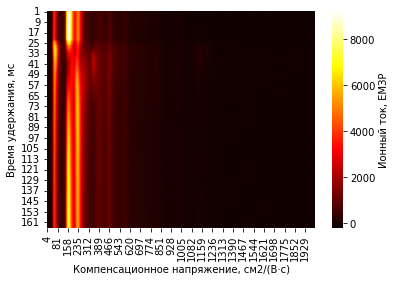

In [5]:
#Отрисовка карты нагрева первоначальных данных
fig, ax = plt.subplots()
raw_heatmap = sns.heatmap(Z_P.transpose(), cmap="hot", cbar_kws={'label': 'Ионный ток, ЕМЗР'}, ax=ax)
raw_heatmap.set(xlabel=('Компенсационное напряжение, см2/(В·c)'),
ylabel=('Время удержания, мс'))
fig.savefig('results/raw_heatmap.png')

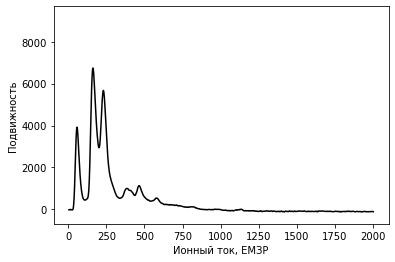

In [6]:
fig, ax = plt.subplots()
camera = Camera(fig)
plt.xlabel('Ионный ток, ЕМЗР')
plt.ylabel('Подвижность')
for i in range(125):
    plt.plot(Z_P.iloc[:,i], color = "black")
    camera.snap()

animation = camera.animate()
animation.save('results/anim_raw_data.gif', writer='pillow')

In [8]:
surf = go.Figure(data=[go.Surface(z=Z_P.values)])
surf.add_annotation(ax = X_P)
surf.update_layout(autosize=False,
                scene = dict(
                    xaxis_title='Something',
                    yaxis_title='Time',
                    zaxis_title='Z AXIS TITLE'),
                  width=1000, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

In [7]:
from scipy.linalg import cholesky
from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_arPLS(y, lam=1e4, ratio=0.05, itermax=100):
    N = len(y)
    D = sparse.eye(N, format='csc')
    D = D[1:] - D[:-1]
    D = D[1:] - D[:-1]
    H = lam * D.T * D
    w = np.ones(N)
    for i in range(itermax):
        W = sparse.diags(w, 0, shape=(N, N))
        WH = sparse.csc_matrix(W + H)
        C = sparse.csc_matrix(cholesky(WH.todense()))
        z = spsolve(C, spsolve(C.T, w * y))
        d = y - z
        dn = d[d < 0]
        m = np.mean(dn)
        s = np.std(dn)
        wt = 1. / (1 + np.exp(2 * (d - (2 * s - m)) / s))
        if np.linalg.norm(w - wt) / np.linalg.norm(w) < ratio:
            break
        w = wt
    return z

[ -24.  -28.  -31. ... -114. -114. -115.]


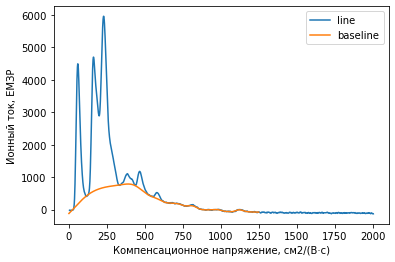

In [16]:
warnings.filterwarnings('ignore')

frame = 70
fig, ax = plt.subplots()
plt.plot(Z_P.iloc[:, frame], label='line')
print(Z_P.iloc[:, 100].to_numpy())
baseline = baseline_arPLS(Z_P.iloc[:1250, frame].to_numpy(), 10**4, 0.01)
plt.plot([i for i in range(0, 1250)], baseline, label='baseline')
plt.xlabel('Компенсационное напряжение, см2/(В·c)')
plt.ylabel('Ионный ток, ЕМЗР')
ax.legend()
fig.savefig(f'results/frame_{frame}_with_baseline.png')


plt.show()

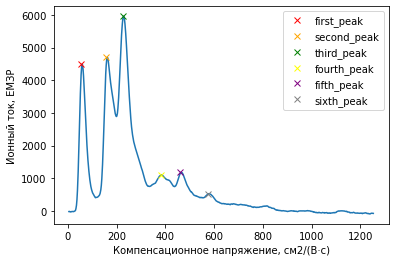

In [34]:
frame = 70
fig, ax = plt.subplots()
plt.plot(Z_P.iloc[:1250, frame], label='line')
plt.xlabel('Компенсационное напряжение, см2/(В·c)')
plt.ylabel('Ионный ток, ЕМЗР')
first_peak, = plt.plot(54, Z_P.iloc[54, frame], 'x', color='red', label='first_peak')
second_peak, = plt.plot(158, Z_P.iloc[158, frame], 'x', color ='orange', label='second_peak')
third_peak, = plt.plot(224, Z_P.iloc[224, frame], 'x', color ='green', label='third_peak')
fourth_peak, = plt.plot(380, Z_P.iloc[380, frame], 'x', color ='yellow', label='fourth_peak')
fifth_peak, = plt.plot(460, Z_P.iloc[460, frame], 'x', color ='purple', label='fifth_peak')
sixth_peak, = plt.plot(575, Z_P.iloc[575, frame], 'x', color ='gray', label='sixth_peak')
ax.legend(handles=[first_peak, second_peak, third_peak, fourth_peak, fifth_peak, sixth_peak])
fig.savefig(f'results/frame_{frame}.png')


plt.show()

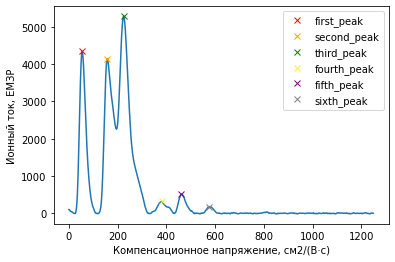

In [38]:
fig, ax = plt.subplots()
plt.plot([i for i in range(0, 1250)], Z_P.iloc[:1250, 70] - baseline)
first_peak, = plt.plot(54, Z_P.iloc[54, frame] - baseline[54], 'x', color='red', label='first_peak')
second_peak, = plt.plot(158, Z_P.iloc[158, frame] - baseline[158], 'x', color ='orange', label='second_peak')
third_peak, = plt.plot(224, Z_P.iloc[224, frame] - baseline[224], 'x', color ='green', label='third_peak')
fourth_peak, = plt.plot(380, Z_P.iloc[380, frame] - baseline[380], 'x', color ='yellow', label='fourth_peak')
fifth_peak, = plt.plot(460, Z_P.iloc[460, frame] - baseline[460], 'x', color ='purple', label='fifth_peak')
sixth_peak, = plt.plot(575, Z_P.iloc[575, frame] - baseline[575], 'x', color ='gray', label='sixth_peak')
ax.legend(handles=[first_peak, second_peak, third_peak, fourth_peak, fifth_peak, sixth_peak])
plt.xlabel('Компенсационное напряжение, см2/(В·c)')
plt.ylabel('Ионный ток, ЕМЗР')
plt.show()
fig.savefig(f'results/processed_{frame}_frame.png')

In [15]:
arPLS_dz = []
for i in tqdm(range(150)):
    new_line = Z_P.iloc[:,i] - baseline_arPLS(Z_P.iloc[:, i].to_numpy(), 10**4, 0.01)
    arPLS_dz.append(new_line.to_numpy())

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [05:03<00:00,  2.02s/it]


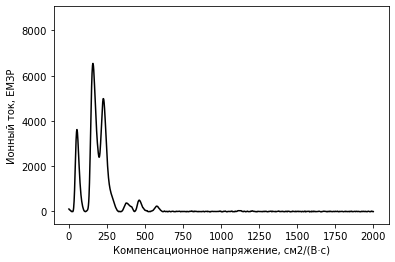

In [16]:
fig, ax = plt.subplots()
camera = Camera(fig)
plt.xlabel('Компенсационное напряжение, см2/(В·c)')
plt.ylabel('Ионный ток, ЕМЗР')
for i in arPLS_dz:
    plt.plot(i, color = "black")
    camera.snap()

animation = camera.animate()
animation.save('results/anim_processed_data.gif', writer = 'pillow')

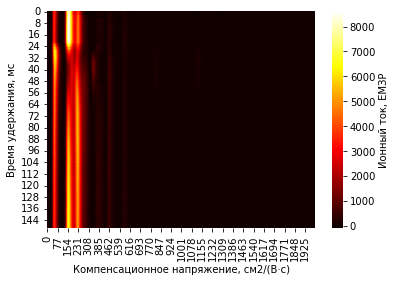

In [17]:
fig, ax = plt.subplots()
arPLS_Z = pd.DataFrame(arPLS_dz)
processed_heatmap = sns.heatmap(arPLS_Z, cmap="hot", cbar_kws={'label': 'Ионный ток, ЕМЗР'}, ax=ax)
processed_heatmap.set(xlabel=('Компенсационное напряжение, см2/(В·c)'),
ylabel=('Время удержания, мс'))
fig.savefig('results/processed_heatmap.png')

In [18]:
arPLS_Z.to_csv('results/arPLS_Z.csv')
X_P.to_csv('results/X.csv')
Y_P.to_csv('results/Y.csv')
Z_P.to_csv('results/Z.csv')